<a href="https://colab.research.google.com/github/marcelounb/NLP-Jason-Brownlee/blob/main/12_Gensim_NLP_Word2VEC_and_Glo_ve_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U gensim

     |████████████████████████████████| 24.2MB 129kB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


# 12.4 Develop Word2Vec Embedding

In [9]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [3]:
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
['this', 'is', 'the', 'second', 'sentence'],
['yet', 'another', 'sentence'],
['one', 'more', 'sentence'],
['and', 'the', 'final', 'sentence']]

In [4]:
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [5]:
# summarize vocabulary
words = list(model.wv.vocab)
print(words)

['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


In [6]:
# access vector for one word
print(model['sentence'])

[ 0.00109012  0.00298871  0.00025375  0.00100167  0.00403195 -0.0018775
 -0.00207089 -0.00131884  0.00190272 -0.00088583 -0.00490731 -0.00142892
 -0.00419834  0.00062181 -0.0024971  -0.00343892 -0.00118494 -0.00102316
  0.00170165 -0.00429158 -0.00298925 -0.00158085 -0.00129824  0.00030156
 -0.00069301 -0.0016065   0.00348394  0.00276677 -0.00229425 -0.00486683
  0.00062058  0.00083455  0.00336013  0.00335394  0.00334187 -0.00359066
  0.00151546 -0.00104991  0.00492543 -0.00157892  0.00115428  0.00250701
 -0.0010305   0.00264295  0.00135617  0.00045249 -0.00496048 -0.00058864
  0.00403873  0.0039874  -0.00399197 -0.0018567   0.00156981  0.00243898
  0.00029337 -0.00039162 -0.00174281  0.00239073  0.00267645 -0.00042441
 -0.00434189  0.00144882 -0.00235409  0.00399378  0.00163428  0.00303849
  0.00375428  0.00022697  0.00490657  0.00032752  0.00106742 -0.00078733
 -0.00386949 -0.00395568  0.00375174 -0.00339218  0.00334644  0.00366498
  0.00470393  0.00143777 -0.00186754 -0.00470399 -0.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [7]:
# save model
model.save('model.bin')

In [8]:
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [10]:
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


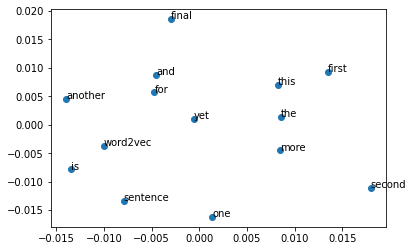

In [11]:
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
  pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# 12.6 Load Google's Word2Vec Embedding

In [12]:
from gensim.models import KeyedVectors

In [17]:
!pip install wget
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9681 sha256=bd53e7a62b6336742c45ccdcf9f9270bdf3dcc3ddedcad8956c60c8de22f9a73
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
--2020-12-16 13:09:13--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.38.62
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.38.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  17.0MB/s    in 96s     

2020-12-16 13:10:50 (16.3 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [19]:
# load the google word2vec model
# filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format('/content/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [22]:
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7118192911148071)]


# Load Stanford's GloVe Embedding

In [28]:
from gensim.scripts.glove2word2vec import glove2word2vec

In [29]:
!wget -c "http://nlp.stanford.edu/data/glove.6B.zip"

--2020-12-16 13:41:30--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-12-16 13:41:31--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-12-16 13:41:31--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [30]:
!unzip '/content/glove.6B.zip'

Archive:  /content/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [31]:
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

In [34]:
filename = 'glove.6B.100d.txt.word2vec'
model2 = KeyedVectors.load_word2vec_format(filename, binary=False)
# calculate: (king - man) + woman = ?
result = model2.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7698541283607483)]
